In [1]:
%config Complter.use_jedi=False

In [2]:
import pandas as pd
import numpy as np

In [3]:
# import datasets
movies = pd.read_csv('training_ratings_for_kaggle_comp.csv')
sample_sub = pd.read_csv('sample_submission.csv')

In [4]:
movies.shape

(500100, 4)

In [5]:
movies.head()

,user,movie,rating,id
0,2783,1253,5,2783_1253
1,2783,589,5,2783_589
2,2783,1270,4,2783_1270
3,2783,1274,4,2783_1274
4,2783,741,5,2783_741


In [7]:
movies.duplicated().any()

False

In [8]:
movies.columns

Index(['user', 'movie', 'rating', 'id'], dtype='object')

## 1. Popularity based recommendation system

In [9]:
def create_popularity_recommendation(train_data, movie, rating):
    # get count of ratings for each unique movie
    train_data_grouped = train_data.groupby([movie]).agg({rating: 'count'}).reset_index()
    
    # sort results
    train_data_sort = train_data_grouped.sort_values(['rating'], ascending = [0])# ascending =  true or boolean
    # mean rating
#     train_data_sort['mean_rating'] = train_data_sort.groupby('movie')['rating'].mean().reset_index() 
    
    # generate a rank
    train_data_sort['Rank'] = train_data_sort['rating'].rank(ascending=0, method='max')
    
    # get the top 10 recommendations
    popularity_recommendations = train_data_sort.head(10)
    return popularity_recommendations
    

In [10]:
recodns = create_popularity_recommendation(movies, 'movie', 'rating')
recodns

,movie,rating,Rank
2549,2858,1684,1.0
1053,1196,1585,2.0
249,260,1573,3.0
1067,1210,1539,4.0
1125,1270,1396,5.0
2278,2571,1373,6.0
2455,2762,1369,7.0
566,593,1360,8.0
1769,2028,1353,9.0
579,608,1340,10.0


## 2. Correlation based recommendation system

- based on the movie ratings, lets try to find the correlation between movies!

In [7]:
# try with different dataset to see how the pearson correlation stacks up with bayesian inferencing!
data = pd.read_csv('dataset_4_ratings.txt')
names = pd.read_csv('movie_names.csv')
data.head()

,user_id,movie_id,rating
0,22.0,377.0,0.0
1,62.0,257.0,0.0
2,95.0,546.0,0.0
3,38.0,95.0,1.0
4,63.0,277.0,1.0


In [8]:
names.head()

,movie_id,movie_name
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
data = data.merge(right=names, how='inner')

In [10]:
data.head()

,user_id,movie_id,rating,movie_name
0,22.0,377.0,0.0,Heavyweights (1994)
1,5.0,377.0,0.0,Heavyweights (1994)
2,13.0,377.0,0.0,Heavyweights (1994)
3,62.0,257.0,0.0,Men in Black (1997)
4,25.0,257.0,1.0,Men in Black (1997)


In [11]:
data.groupby('movie_name')['rating'].mean().sort_values(ascending=False).head()

movie_name
unknown                                             1.0
Giant (1956)                                        1.0
The Innocent (1994)                                 1.0
Blood For Dracula (Andy Warhol's Dracula) (1974)    1.0
Thin Man, The (1934)                                1.0
Name: rating, dtype: float64

In [12]:
data.rating.value_counts()

1.0    6245
0.0    4248
Name: rating, dtype: int64

In [169]:
data.groupby('movie_name')['rating'].count().sort_values(ascending=False).head(30)

movie_name
Star Wars (1977)                                67
Fargo (1996)                                    58
Twelve Monkeys (1995)                           57
Return of the Jedi (1983)                       54
Independence Day (ID4) (1996)                   53
Contact (1997)                                  52
Liar Liar (1997)                                51
Toy Story (1995)                                51
Raiders of the Lost Ark (1981)                  49
Silence of the Lambs, The (1991)                47
Chasing Amy (1997)                              47
Scream (1996)                                   47
Pulp Fiction (1994)                             46
Fugitive, The (1993)                            46
Mission: Impossible (1996)                      45
English Patient, The (1996)                     45
Jerry Maguire (1996)                            44
Willy Wonka and the Chocolate Factory (1971)    44
Birdcage, The (1996)                            44
Star Trek: First Con

In [14]:
ratings = pd.DataFrame(data=data.groupby('movie_name')['rating'].mean())
ratings.head()

,rating
movie_name,
101 Dalmatians (1996),0.150000
12 Angry Men (1957),0.928571
187 (1997),0.500000
"20,000 Leagues Under the Sea (1954)",0.545455
2001: A Space Odyssey (1968),0.885714


In [15]:
ratings['num of ratings'] = data.groupby('movie_name')['rating'].count()
ratings.head()

,rating,num of ratings
movie_name,,
101 Dalmatians (1996),0.150000,20
12 Angry Men (1957),0.928571,14
187 (1997),0.500000,2
"20,000 Leagues Under the Sea (1954)",0.545455,11
2001: A Space Odyssey (1968),0.885714,35


In [16]:
ratings['rating'].hist(bins=50);

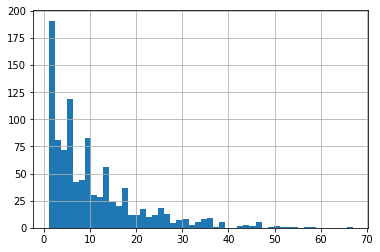

In [17]:
ratings['num of ratings'].hist(bins=50);

In [177]:
data.head()

,user_id,movie_id,rating,movie_name
0,22.0,377.0,0.0,Heavyweights (1994)
1,5.0,377.0,0.0,Heavyweights (1994)
2,13.0,377.0,0.0,Heavyweights (1994)
3,62.0,257.0,0.0,Men in Black (1997)
4,25.0,257.0,1.0,Men in Black (1997)


In [18]:
# create a movie matrix
movie_matrix = pd.pivot_table(data=data, index='user_id', columns='movie_name', values='rating')

In [19]:
movie_matrix.head() # print head of df

movie_name,101 Dalmatians (1996),12 Angry Men (1957),187 (1997),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",Absolute Power (1997),"Abyss, The (1989)",Ace Ventura: Pet Detective (1994),...,Wolf (1994),"Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wrong Trousers, The (1993)",Wyatt Earp (1994),Year of the Horse (1997),Young Frankenstein (1974),Young Guns (1988),"Young Poisoner's Handbook, The (1995)",unknown
user_id,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,1.0,NaN,0.0,1.0,NaN,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.0,NaN,1.0
2.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0


In [34]:
star_wars_rating = movie_matrix['Star Wars (1977)']
star_wars_rating
corr_to_star_wars = movie_matrix.corrwith(star_wars_rating)

/home/bosco/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/bosco/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [36]:
corr_to_star_wars

movie_name
101 Dalmatians (1996)                                       0.091287
12 Angry Men (1957)                                              NaN
187 (1997)                                                       NaN
20,000 Leagues Under the Sea (1954)                              NaN
2001: A Space Odyssey (1968)                               -0.135873
3 Ninjas: High Noon At Mega Mountain (1998)                      NaN
39 Steps, The (1935)                                             NaN
Absolute Power (1997)                                       0.142857
Abyss, The (1989)                                          -0.258199
Ace Ventura: Pet Detective (1994)                                NaN
Ace Ventura: When Nature Calls (1995)                            NaN
Across the Sea of Time (1995)                                    NaN
Addams Family Values (1993)                                -0.418330
Addicted to Love (1997)                                          NaN
Addiction, The (1995)  

In [37]:
corr = pd.DataFrame(data=corr_to_star_wars, columns=['correlation']) # create a df
corr.dropna(inplace=True) # drop missing values from above series
corr.head(10) # print the head just as before (above)

,correlation
movie_name,
101 Dalmatians (1996),0.091287
2001: A Space Odyssey (1968),-0.135873
Absolute Power (1997),0.142857
"Abyss, The (1989)",-0.258199
Addams Family Values (1993),-0.418330
"Adventures of Priscilla, Queen of the Desert, The (1994)",0.101130
"African Queen, The (1951)",0.537484
Air Force One (1997),0.483046
Aladdin (1992),0.288675


In [38]:
corr = corr.join(ratings['num of ratings'])

In [39]:
corr.head()

,correlation,num of ratings
movie_name,,
101 Dalmatians (1996),0.091287,20
2001: A Space Odyssey (1968),-0.135873,35
Absolute Power (1997),0.142857,11
"Abyss, The (1989)",-0.258199,13
Addams Family Values (1993),-0.418330,12


- A movie has to be rated by at least 30 people to be recommended to a new user in this case

In [40]:
final_df = corr[corr['num of ratings'] > 30].sort_values(by='correlation',ascending=False)
final_df.head(20)

,correlation,num of ratings
movie_name,,
Star Wars (1977),1.000000,67
"Empire Strikes Back, The (1980)",0.626173,39
Raiders of the Lost Ark (1981),0.551093,49
Air Force One (1997),0.483046,39
Aliens (1986),0.405720,31
Star Trek: First Contact (1996),0.403604,43
Scream (1996),0.372104,47
"Full Monty, The (1997)",0.353553,34
Return of the Jedi (1983),0.348375,54


Conclusion
---
- based on this simple recommendation system, if someone watched star wars (as in the example above), the next movie to recommed them would be The Empire Strikes Back and so on.